#Задание 2.

-Прочитать статью ""An Improved VGG16 Model for Pneumonia Image Classification"" by Zhi-Peng Jiang et al., 2021.

-Реализовать модель диагностики пневмоторакса на основе IVGG13 (см. статью)

-Выполнить тюнинг гиперпараметров модели и улучшить метрики accuracy, precision, recall по сравнению с исходной моделью, представленной в уроке.

-Провести сравнительный анализ ROC-кривых полученных моделей. Выбрать оптимальный threshold.

# Загрузка библиотек

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка данных

In [ ]:
# Путь к данным
base_dir = "drive/MyDrive/CV для мед изображений/chest_xray"

In [ ]:
# Каталоги
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Создание датасетов
batch_size = 32
img_size = (224, 224)

train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='binary',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


# Модель VGG13

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer

def build_vgg13(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),

        # Первый блок Conv + MaxPooling
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Второй блок Conv + MaxPooling
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Третий блок Conv + MaxPooling
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Четвертый блок Conv + MaxPooling
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Пятый блок Conv + MaxPooling
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Полносвязные слои
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),

        # Выходной слой для бинарной классификации
        Dense(1, activation='sigmoid')
    ])

    return model

input_shape = (224, 224, 1)
model = build_vgg13(input_shape)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,953,793 (491.92 MB)

 Trainable params: 128,953,793 (491.92 MB)

 Non-trainable params: 0 (0.00 B)

# Обучение

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1080s 6s/step - accuracy: 0.7188 - loss: 219.9703 - val_accuracy: 0.6250 - val_loss: 2.5243
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 347ms/step - accuracy: 0.8684 - loss: 0.3069 - val_accuracy: 0.7500 - val_loss: 0.7464
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 341ms/step - accuracy: 0.8842 - loss: 0.2718 - val_accuracy: 0.8125 - val_loss: 0.5044
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 344ms/step - accuracy: 0.9003 - loss: 0.2307 - val_accuracy: 0.9375 - val_loss: 0.2726
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 347ms/step - accuracy: 0.9132 - loss: 0.2003 - val_accuracy: 1.0000 - val_loss: 0.0415
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 344ms/step - accuracy: 0.9331 - loss: 0.1831 - val_accuracy: 0.9375 - val_loss: 0.1674
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.9203 - loss: 0.2123 - val_accuracy: 1.0000 - val_loss: 0.0460
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 342ms/step - accuracy: 0.9386 - loss: 

# Оценка эффективности модели

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Получение предсказаний для тестового набора
test_dataset = test_dataset.unbatch()
test_images = []
test_labels = []

In [ ]:
for image, label in test_dataset:
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

In [ ]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
preds = model.predict(test_images)
y_true = test_labels
y_pred = preds.ravel()

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


In [ ]:
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

In [ ]:
# Расчет метрик
accuracy = accuracy_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)
recall = recall_score(y_true, y_pred_class)
f1 = f1_score(y_true, y_pred_class)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.8108974358974359
Precision: 0.8953488372093024
Recall: 0.7897435897435897
F1-score: 0.8392370572207083


In [ ]:
# ROC-кривая и AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)


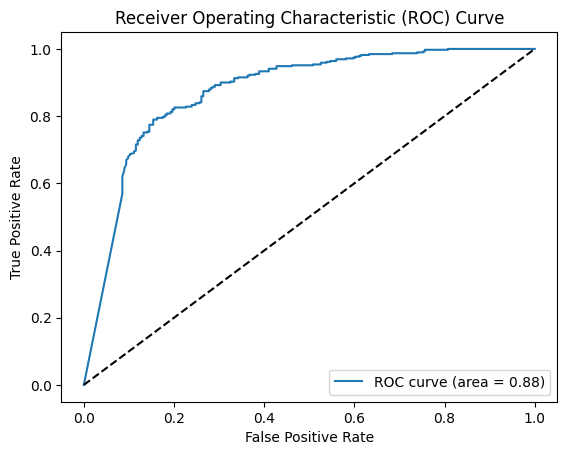

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Определение оптимального порога
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold: {optimal_threshold}')

Optimal threshold: 0.9999730587005615


In [ ]:
# Пример использования порога
y_pred_class = (y_pred >= optimal_threshold).astype(int)

# Ковариационная матрица

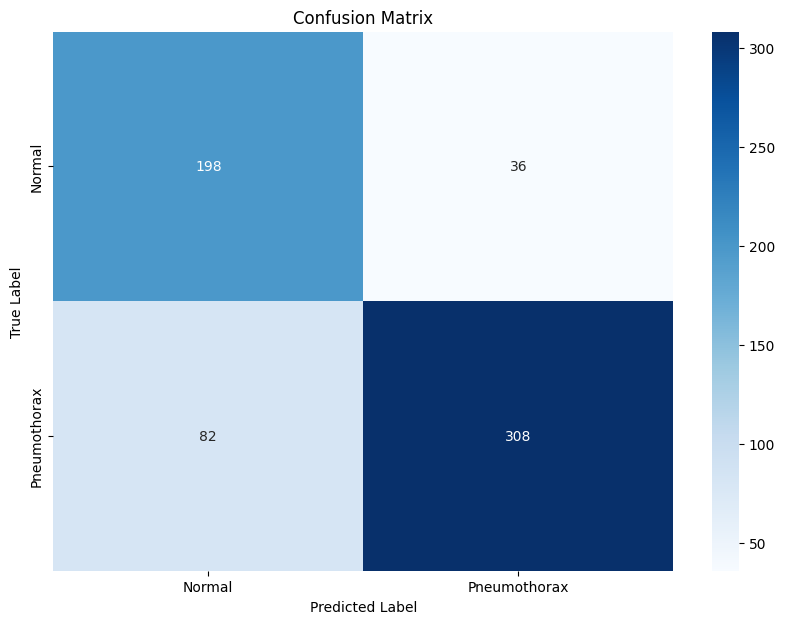

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumothorax'], yticklabels=['Normal', 'Pneumothorax'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Вывод:

Была реализована модель диагностики пневмоторакса на основе IVGG13. Accurasy получилась довольно высокой = 0.8108.

ROC curve покрывает 0.88 верных предсказаний. Это высокий показатель эффективности модели.

Оптимальный порог (threshold) 0.9999.

По ковариационной матрице: Высокий показатель правильных предсказаний пневмоторокса и нормы. Но есть ошибки предсказаний. Ошибка второго рода, где больному предсказывают отсутствие заболевания = 82. Ошибка первого рода = 36.
Необходимо уменьшать ошибку второго рода.


In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.8108974358974359
Precision: 0.8953488372093024
Recall: 0.7897435897435897
F1-score: 0.8392370572207083
